# Neural networks

In the following exercises, you will implement and experiment with neural networks. 
Starting from the very basics of the Perceptron, you will implement logical connectives. 
Then, you will look at the feedforward pass and MSE loss function.
Finally, you will call play around with the Sklearn implementation of the Multi-layer perceptron classifier, and start using Pytorch as the building tool for Neural Networks.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### The Perceptron

The simplest variant of the **perceptron** consists of:
- linear combination of inputs and weights (weighted sum or dot-product)
- a threshold function $f$

Given $d$ inputs $x_1, x_2, \dots, x_d$, we compute
$$
    y = f\left(\sum_{j = 1}^d w_j x_j + w_0\right)
$$
where 
$$
    f(x) = \begin{cases}
        1 & \text{if $x > 0$}\\
        0 & \text{otherwise}
    \end{cases}
$$
is called the **activation function**, i.e., it models the stimuli in a biological neuron.

Example use-cases of the perception are learning linearly separable **logic gates**:
- learn the logical **AND-gate**
- learn the logical **OR-gate**

In [2]:
# threshold function "vectorized", so that we can apply it on numpy arrays
f = np.vectorize(lambda x: 1 if x > 0 else 0)

# our simple dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

# parameters chosen by hand (without machine learning)
and_gate = lambda x1, x2: f(1*x1 + 1*x2 - 1.5)
or_gate = lambda x1, x2: f(1*x1 + 1*x2 - 0.5)

print(f"AND gate outputs: {and_gate(X[:, 0], X[:, 1])}")
print(f"OR gate outputs:  {or_gate(X[:, 0], X[:, 1])}")

AND gate outputs: [0 0 0 1]
OR gate outputs:  [0 1 1 1]


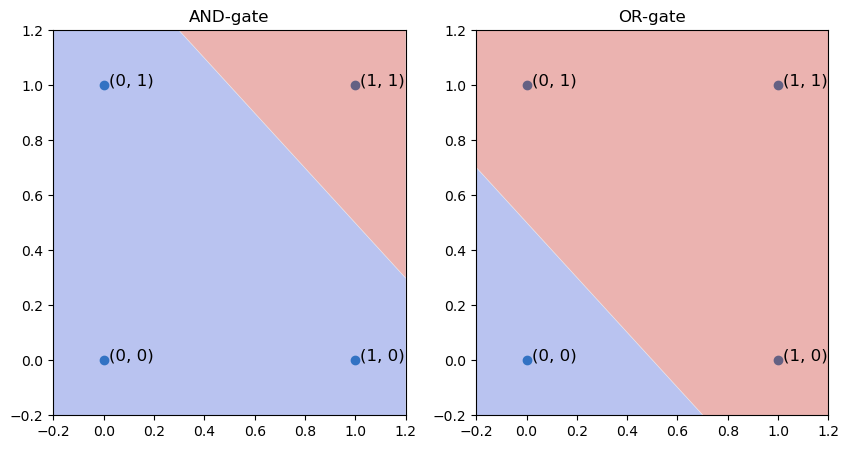

In [3]:
xx, yy = np.meshgrid(
    np.linspace(-0.2, 1.2, 300), 
    np.linspace(-0.2, 1.2, 300) 
)
D = np.vstack((xx.flatten(), yy.flatten())).T

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(X[:, 0], X[:, 1])
axes[1].scatter(X[:, 0], X[:, 1])
for x1, x2 in X:
    axes[0].annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)
    axes[1].annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)

axes[0].set_title("AND-gate")
axes[1].set_title("OR-gate")

axes[0].contourf(xx, yy, and_gate(D[:, 0], D[:, 1]).reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)
axes[1].contourf(xx, yy, or_gate(D[:, 0], D[:, 1]).reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)
plt.plot()

Some observations:
- The perceptron is a model for an **articial neuron**. 
- The perceptron defines a **linear discriminant**, meaning that it cannot solve the non-linear XOR-gate. 
- Threshold function $f$ is a *hard* thresholding function. Later, we will look at the **sigmoid** function which is a *soft* thresholding function.

**Key idea**: we can stack multiple perceptron to form a layer of perceptron. This allows us to solve non-linear problems (such as XOR). 

### Exclusive Or (XOR)

|x1|x2|XOR|
|-|-|-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

$x_1 \text{ XOR } x_2 = (x_1 \text{ AND } \text{ NOT } x_2) \text{ OR } (\text{ NOT } x_1 \text{ AND } x_2)$

$x_1 \oplus x_2 = (x_1 \land \neg x_2) \lor (\neg x_1 \land x_2)$

#### Exercise: design the XOR gate

Requirements
- Design a NOT-gate in the form of $f(w x + b)$, where $f$ is the thresholding function and $w, b$ are the parameters of this model.
- Combine the AND-gate, OR-gate, and NOT-gate to get the XOR-gate

In [ ]:
# AND/OR and activation function as a reference
f = np.vectorize(lambda x: 1 if x > 0 else 0)
and_gate = lambda x1, x2: f(1*x1 + 1*x2 - 1.5)
or_gate  = lambda x1, x2: f(1*x1 + 1*x2 - 0.5)

# design not_gate
not_gate = lambda x: ()

# design xor_gate
xor_gate = lambda x1, x2: ()

print(f"XOR gate outputs:  {xor_gate(X[:, 0], X[:, 1])}")

XOR gate outputs:  ()


Visualization of your constructed XOR-gate

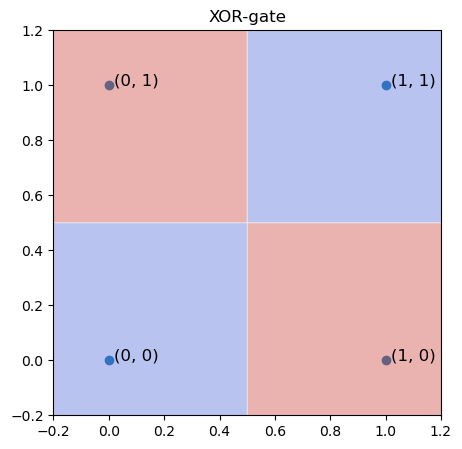

In [9]:
xx, yy = np.meshgrid(
    np.linspace(-0.2, 1.2, 300), 
    np.linspace(-0.2, 1.2, 300) 
)
D = np.vstack((xx.flatten(), yy.flatten())).T

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1])
for x1, x2 in X:
    plt.annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)

plt.title("XOR-gate")
plt.contourf(xx, yy, xor_gate(D[:, 0], D[:, 1]).reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)
plt.show()

### Feed forward pass through the network

Consider this very simple Neural Network. It consists of 
- input $x$
- layer 1 weight $w_1$
- sigmoid activation function: 
$
    \text{sigmoid}(x) = \dfrac{1}{1 + e^{-x}}
$
- layer 2 weight $w_2$
- output $y$

Small visual of this network:
```
                ___________             
    x -- w1 --> | sigmoid | -- w2 --> y
                -----------            
```
In mathematical notation, the forward pass can be constructed as:

$z = \text{sigmoid}(w_1 x)$

$y = w_2 z$

As an exercise, fill in the predict function to compute the forward pass

In [ ]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# feedforward model
def predict(x, w1, w2):
    ##############################
    ### write code here
    ##############################
    return

We use the Mean-Squared-Error (MSE) loss function to capture how much of the predictions are wrong
$$
    MSE(\textbf{y}, \hat{\textbf{y}}) = \dfrac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
$$

As an exercise, implement the MSE in the following function.

*Hint*: you may consider `y_true` and `y_pred` as lists of numbers, or otherwise known as vectors

In [ ]:
# MSE loss function
def loss_func(y_true, y_pred):
    ##############################
    ### write code here
    ##############################
    return 

## Sklearn implementation

Implement and train a Neural Network using the **Sklearn library**  

In [ ]:
from sklearn.neural_network import MLPClassifier

# training set
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
y = np.array([0, 1, 1, 0])

# for visualization purposes, we need a meshgrid that linearly spans the 2-dimensional space
xx, yy = np.meshgrid(
    np.linspace(-0.2, 1.2, 300), 
    np.linspace(-0.2, 1.2, 300) 
)
D = np.vstack((xx.flatten(), yy.flatten())).T

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# visualize hand-chosen weights for comparison
ax1.scatter(X[:, 0], X[:, 1])
for x1, x2 in X:
    ax1.annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)
ax1.set_title("XOR-gate")
ax1.contourf(xx, yy, xor_gate(D[:, 0], D[:, 1]).reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)

# Train model and predict
mlp = None
##############################
### create MLP model and experiment with different hyperparameters for this model
### train the model by calling the fit method
### write code here
##############################

# predict meshgrid for visualization purposes
y_pred = mlp.predict(D)

ax2.scatter(X[:, 0], X[:, 1])
for x1, x2 in X:
    ax2.annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)
ax2.set_title("Learned XOR-gate")
ax2.contourf(xx, yy, y_pred.reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)

mlp.score(X, y)

### Synthetic classification using MLP 

Now we are using a synthetic dataset to give you a better understanding of what a neural network learns

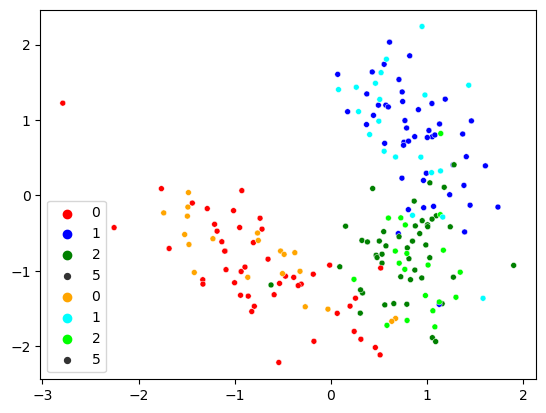

In [616]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# create classification dataset 
X, y = make_classification(
    n_samples=200, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_repeated=0, 
    n_classes=3,
    n_clusters_per_class=1,
    class_sep=1
)

# standardize dataset so that each variable has zero mean and unit variance
X = (X - X.mean())/X.std() 

# create meshgrid to visualize decision boundaries
xmin = X[:, 0].min(); xmax = X[:, 0].max()
ymin = X[:, 1].min(); ymax = X[:, 1].max()
xx, yy = np.meshgrid(
    np.linspace(xmin-.5, xmax+.5, 100),
    np.linspace(ymin-.5, ymax+.5, 100)
)
D = np.vstack((xx.flatten(), yy.flatten())).T

# split the dataset in train/test partition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, size=5, palette=['r', 'b', 'g'])
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, size=5, palette=['orange', 'cyan', 'lime'])
plt.show()

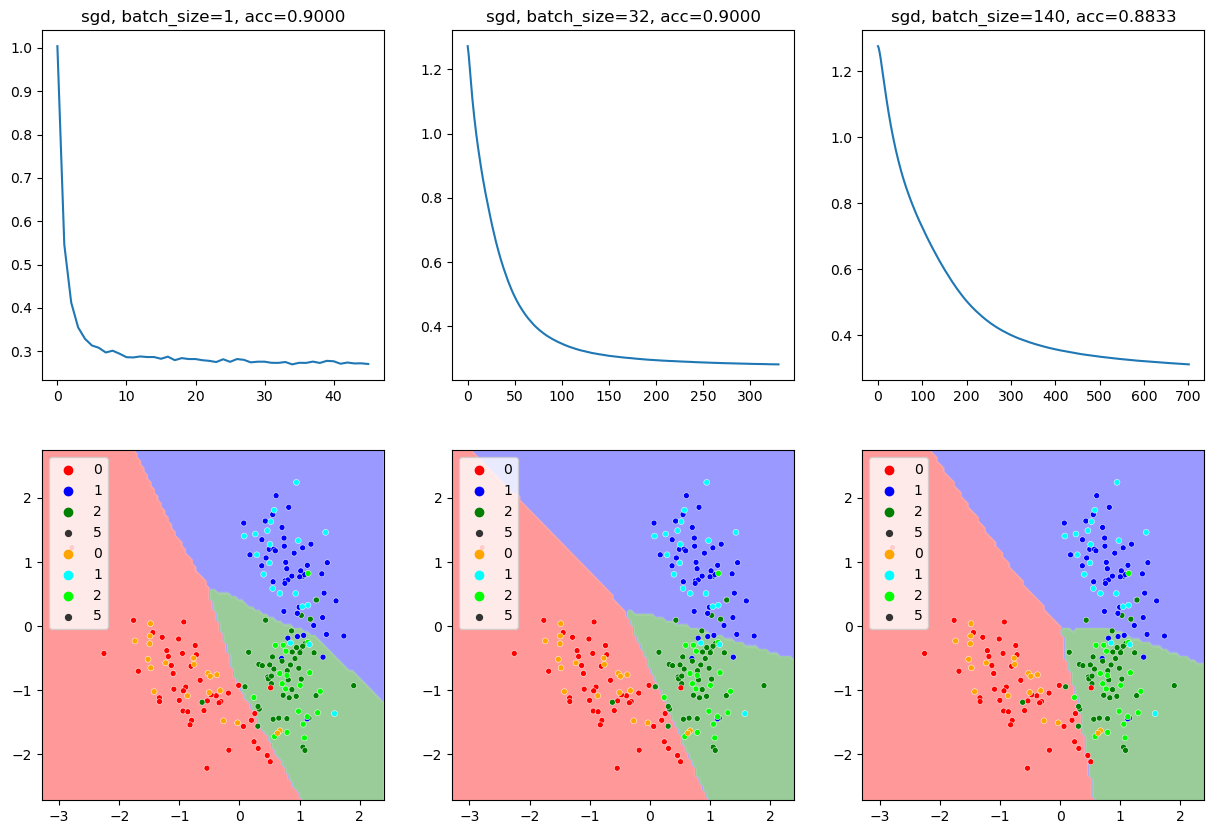

In [622]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
from matplotlib.colors import ListedColormap
cmap1 = ListedColormap(['red', 'blue', 'green'])

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

batch_sizes = [1, 32, X_train.shape[0]]

for i, b in enumerate(batch_sizes):
    mlp = None
    ##############################
    ### create MLP model and experiment with different hyperparameters for this model
    ### set the batch size with local variable b, so that you can see what the effect is of using different batch sizes
    ### train the model by calling the fit method
    ### write code here
    ##############################
    
    acc = mlp.score(X_test, y_test)
    axes[0, i].set_title(f"sgd, batch_size={b}, {acc=:.4f}")
    sns.lineplot(x=range(len(mlp.loss_curve_)), y=mlp.loss_curve_, ax=axes[0, i])

    y_pred = mlp.predict(D)
    
    axes[1, i].contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap1, alpha=0.4, antialiased=True)
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], size=5, hue=y_train, palette=['r', 'b', 'g'], ax=axes[1, i])
    sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], size=5, hue=y_test, palette=['orange', 'cyan', 'lime'], ax=axes[1, i])

## Pytorch exercises

In these exercises you will try to implement an MLP in Pytorch. 

Pytorch is a deeplearning library that provides finer-grained control over the structure and type of model. 
In the following weeks we will use Pytorch for all deeplearning models. 

The key idea behind Pytorch is that you work with the `Tensor` object, which is a multi-dimensional array similar to `numpy` arrays. The key difference is that Pytorch maintains a computation graph for each computation that the `Tensor` objects are involved in. This allows us to perform backpropagation by working backwards on the computation graph and calculating the derivative of the loss with respect to each of the sub-computations. Naturally, the use of Pytorch is nice because it abstracts away the optimization step. 

Before you delve into the exercises, try to get acquanted with the `Tensor` object. Try to understand what the following concepts are:
- the `shape` of the tensor
- the `dtype` of the tensor
- indexing into tensors
- (optionally) look into broadcasting semantics of tensors
 
For example `a = torch.Tensor([[1, 2], [3, 4]])` creates a tensor with 2 rows and 2 columns. Its shape is therefore `(2, 2)`, its dtype is `torch.float32`.
We can index by calling `a[1]` which gives us the second row, or `a[:, 0]` which gives us the first column (the `:` returns us all rows and then we limit this selection by indexing into the first column). 

We will first build a `torch` model, and then implement a training loop

In [1]:
import torch
from torch import nn
from torch.nn import functional as F

In [3]:
class MyCustomMLP(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 3)
        
    def forward(self, x):
        # input x must have shape: (batch_size, 2)
        
        # apply first linear layer followed by point-wise non-linear activation
        # in this case, we use the ReLU activation, which is commonly used
        # hidden activation z has shape: (batch_size, 10) 
        z = F.relu(self.fc1(x))

        y = None
        ##############################
        ### finish the feedforward layer by transforming z using fc2 and applying relu
        ### call the result y, and return it
        ### hint: the output must have shape: (batch_size, 3) 
        ### write code here
        ##############################
        return y